In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
                                                                    #SR1 - Data Sourcing 
# Load the dataset
Human = pd.read_csv(r"C:\Users\PC\Desktop\Test2\health_zaf.csv")


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(Human.head())

First few rows of the dataset:
    Country Name   Country ISO3        Year  \
0  #country+name  #country+code  #date+year   
1   South Africa            ZAF        2016   
2   South Africa            ZAF        2016   
3   South Africa            ZAF        2016   
4   South Africa            ZAF        2016   

                                      Indicator Name   Indicator Code  \
0                                    #indicator+name  #indicator+code   
1  Women who believe a husband is justified in be...   SG.VAW.ARGU.ZS   
2  Women who believe a husband is justified in be...   SG.VAW.BURN.ZS   
3  Women who believe a husband is justified in be...   SG.VAW.GOES.ZS   
4  Women who believe a husband is justified in be...   SG.VAW.NEGL.ZS   

                  Value  
0  #indicator+value+num  
1                   2.2  
2                     1  
3                   2.1  
4                   3.8  


In [37]:
                                                                    # SR2 - Pre-processing 
                                        
# Understanding the size of the dataset
print("\nSize of the dataset (rows, columns):")
print(Human.shape)


Size of the dataset (rows, columns):
(8245, 6)


In [7]:

# Data types of the columns
print("\nData types of the columns:")
print(Human.dtypes)



Data types of the columns:
Country Name      object
Country ISO3      object
Year              object
Indicator Name    object
Indicator Code    object
Value             object
dtype: object


In [38]:


# Columns in the dataset
print("\nColumns in the dataset:")
print(Human.columns)


Columns in the dataset:
Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')


In [69]:

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(Human.describe())


Summary statistics of the dataset:
        Country Name Country ISO3  Year Indicator Name Indicator Code Value
count           8245         8245  8245           8245           8245  8245
unique             2            2    65            567            567  6959
top     South Africa          ZAF  2016  Net migration    SM.POP.NETM  1.04
freq            8244         8244   467             64             64    21


In [8]:

# Identifying missing data
print("\nMissing data in the dataset:")
print(Human.isnull().sum())


Missing data in the dataset:
Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64


In [93]:
# Data slicing and indexing
print("\nSlicing and Indexing examples:")



Slicing and Indexing examples:


In [9]:
# Accessing a single column
print("\nSingle column Indicator Name:")
print(Human['Indicator Name'].head())

# Accessing multiple columns
print("\nMultiple columns Country Name and Country ISO3:")
print(Human[['Country Name', 'Country ISO3']].head())

# Accessing specific rows using iloc (index-based)
print("\nRows 0 to 4 using iloc:")
print(Human.iloc[0:5])

# Accessing specific rows using loc (label-based, assuming index is properly labeled)
print("\nRows 0 to 4 using loc:")
print(Human.loc[0:4])

# Accessing specific rows and columns
print("\nRows 0 to 4 and columns Indicator Name and Indicator Code using loc:")
print(Human.loc[0:4, ['Indicator Name', 'Indicator Code']])

# Convert 'Year' column to numeric, invalid parsing will be set as NaN
Human['Year'] = pd.to_numeric(Human['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
Human = Human.dropna(subset=['Year'])

# Convert 'Year' column to int (after dropping NaN values)
Human['Year'] = Human['Year'].astype(int)

# Conditional slicing
print("\nRows where Year > 2000:")
print(Human[Human['Year'] < 2000].head())



Single column Indicator Name:
0                                      #indicator+name
1    Women who believe a husband is justified in be...
2    Women who believe a husband is justified in be...
3    Women who believe a husband is justified in be...
4    Women who believe a husband is justified in be...
Name: Indicator Name, dtype: object

Multiple columns Country Name and Country ISO3:
    Country Name   Country ISO3
0  #country+name  #country+code
1   South Africa            ZAF
2   South Africa            ZAF
3   South Africa            ZAF
4   South Africa            ZAF

Rows 0 to 4 using iloc:
    Country Name   Country ISO3        Year  \
0  #country+name  #country+code  #date+year   
1   South Africa            ZAF        2016   
2   South Africa            ZAF        2016   
3   South Africa            ZAF        2016   
4   South Africa            ZAF        2016   

                                      Indicator Name   Indicator Code  \
0                                   

In [44]:
                                                                # Normalizing data
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
Human = pd.read_csv(r"C:\Users\PC\Desktop\Test2\health_zaf.csv")

# Define numerical columns for normalization
numerical_columns = Human.select_dtypes(include=['float64', 'int64']).columns

# Normalizing data
if not numerical_columns.empty:
    scaler = MinMaxScaler()
    Human_normalized = pd.DataFrame(scaler.fit_transform(Human[numerical_columns]), columns=numerical_columns)

    # Display the normalized dataset
    print("\nNormalized Data:")
    print(Human_normalized.head())
else:
    print("No numerical columns found for normalization.")

# Define and display the subsets
HumanSubset = Human.iloc[:5]  # Example subset using .iloc[]
print("\nSubset using .iloc[]:")
print(HumanSubset)

HumanSubset = Human.loc[:4]  # Example subset using .loc[]
print("\nSubset using .loc[]:")
print(HumanSubset)


No numerical columns found for normalization.

Subset using .iloc[]:
    Country Name   Country ISO3        Year  \
0  #country+name  #country+code  #date+year   
1   South Africa            ZAF        2016   
2   South Africa            ZAF        2016   
3   South Africa            ZAF        2016   
4   South Africa            ZAF        2016   

                                      Indicator Name   Indicator Code  \
0                                    #indicator+name  #indicator+code   
1  Women who believe a husband is justified in be...   SG.VAW.ARGU.ZS   
2  Women who believe a husband is justified in be...   SG.VAW.BURN.ZS   
3  Women who believe a husband is justified in be...   SG.VAW.GOES.ZS   
4  Women who believe a husband is justified in be...   SG.VAW.NEGL.ZS   

                  Value  
0  #indicator+value+num  
1                   2.2  
2                     1  
3                   2.1  
4                   3.8  

Subset using .loc[]:
    Country Name   Country ISO3

## Data Types Used in Relation to Machine Learning

### Health Dataset (health_zaf.csv)

#### Indicator Name
- **Data Type**: Object
- **Description**: This column represents the name of the health indicator.

#### Country Name
- **Data Type**: Object
- **Description**: This column represents the name of the country.

#### Country ISO3
- **Data Type**: Object
- **Description**: This column represents the ISO3 code of the country.

#### Year
- **Data Type**: Integer
- **Description**: This column represents the year of the data recorded.

#### Value
- **Data Type**: Float64
- **Description**: This column represents the value of the health indicator recorded.

### Additional Information (From Original Code)

#### HumanHealthSubset
- **Description**: This subset contains data related to health indicators.

#### HumanSubset
- **Description**: This subset contains unspecified data related to the human dataset.

#### HumanNormalized (Normalized Data)
- **Description**: This dataframe contains the normalized numerical columns of the original health dataset.



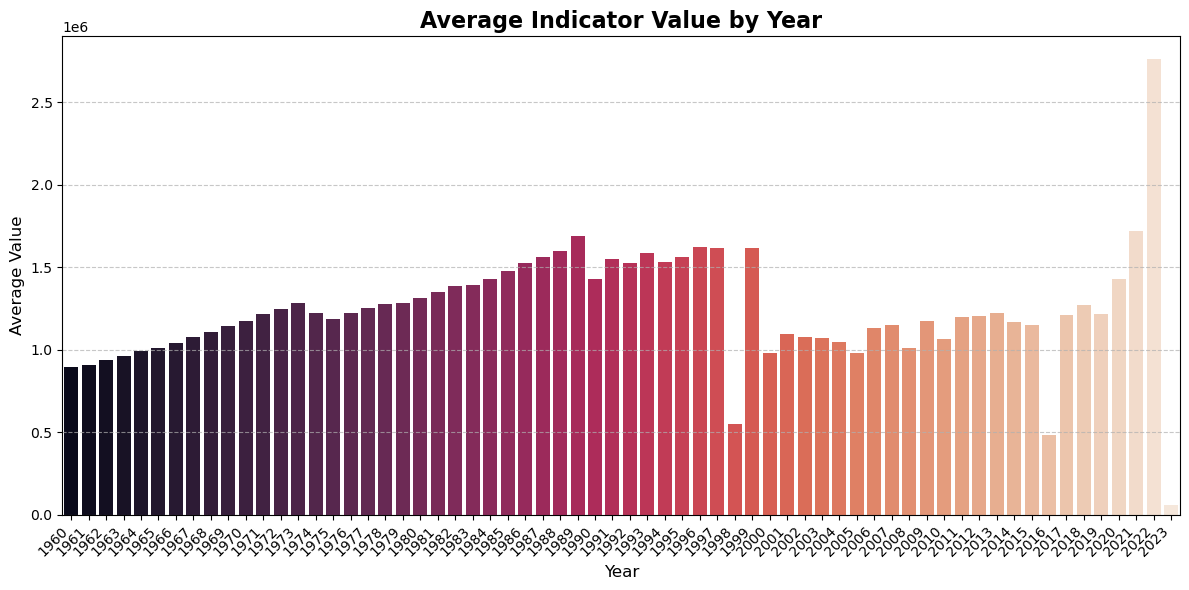

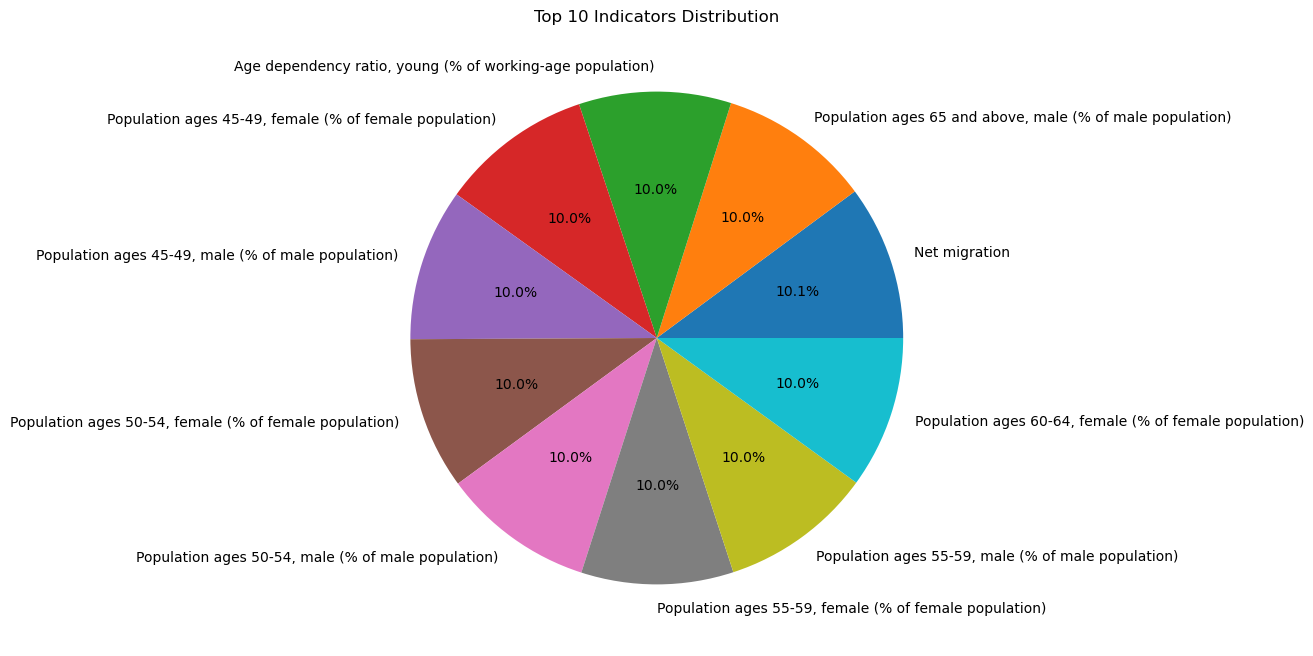

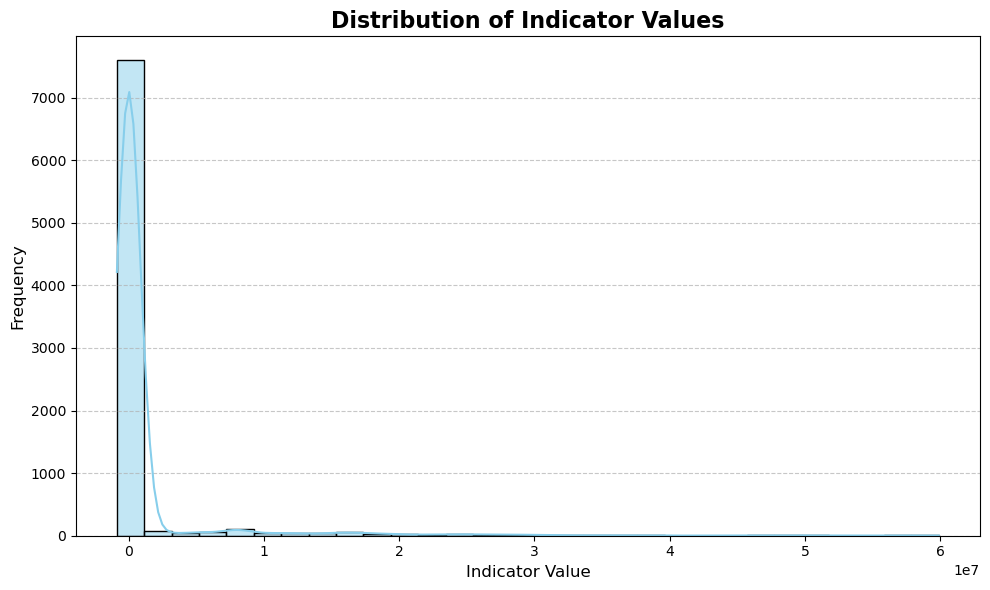

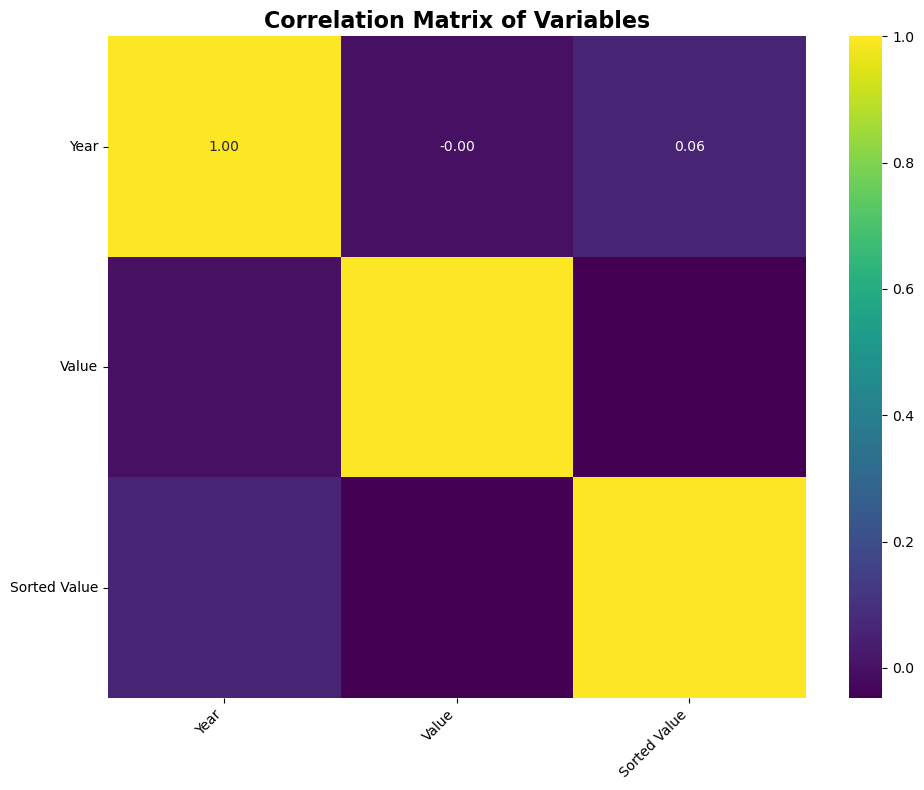

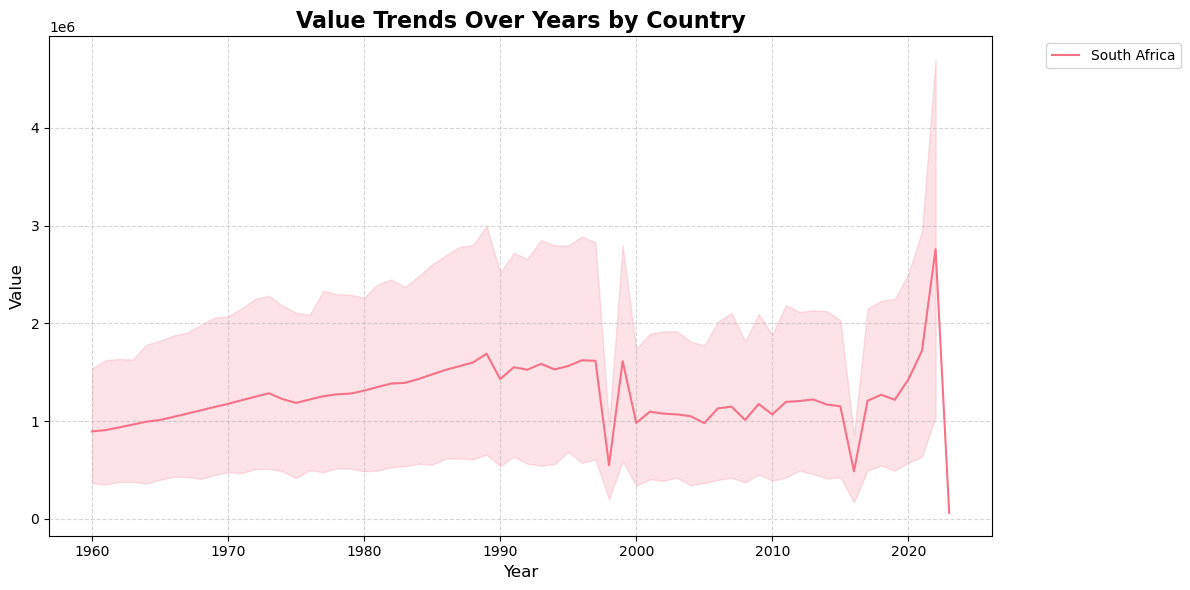


Summary statistics for 'Value' column:
count    8.244000e+03
mean     1.190639e+06
std      5.232578e+06
min     -8.661010e+05
25%      5.984250e+00
50%      3.110000e+01
75%      8.525103e+01
max      5.989388e+07
Name: Value, dtype: float64

Countries with the highest average indicator value:
Country Name
South Africa    1.190639e+06
Name: Value, dtype: float64

Correlation between Year and Value for South Africa: -0.00


In [32]:

# Basic Chart 1: Bar Chart for Average Value by Year
plt.figure(figsize=(12, 6))
avg_value_by_year = data.groupby('Year')['Value'].mean().reset_index()
sns.barplot(x='Year', y='Value', data=avg_value_by_year, palette='rocket')
plt.title('Average Indicator Value by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Basic Chart 2: Pie Chart for Distribution of Indicators
indicator_distribution = data['Indicator Name'].value_counts().head(10)
plt.figure(figsize=(8, 8))
indicator_distribution.plot.pie(autopct='%1.1f%%')
plt.title('Top 10 Indicators Distribution')
plt.ylabel('')
plt.show()

# Basic Chart 3: Histogram of Indicator Values
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Indicator Values', fontsize=16, fontweight='bold')
plt.xlabel('Indicator Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Advanced Chart 1: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
# Selecting only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Advanced Chart 2: Line Plot of Value Trends Over Years by Country
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Country Name', data=data, palette='husl')
plt.title('Value Trends Over Years by Country', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Summary statistics for the 'Value' column
value_summary = data['Value'].describe()
print("\nSummary statistics for 'Value' column:")
print(value_summary)


# Convert 'Year' column to numeric, invalid parsing will be set as NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
data = data.dropna(subset=['Year'])

# Convert 'Year' column to int (after dropping NaN values)
data['Year'] = data['Year'].astype(int)

# Convert 'Value' column to numeric, invalid parsing will be set as NaN
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Drop rows with NaN values in the 'Value' column
data = data.dropna(subset=['Value'])

# Replace 'inf' values with 'NaN'
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Highlighting significant patterns
# 1. Areas with the highest average indicator value
high_avg_value_countries = data.groupby('Country Name')['Value'].mean().sort_values(ascending=False).head(10)
print("\nCountries with the highest average indicator value:")
print(high_avg_value_countries)

# Correlation between 'Year' and 'Value' for each country
for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    if len(country_data) > 1:  # Ensure there is more than one data point
        correlation = country_data['Year'].corr(country_data['Value'])
        print(f"\nCorrelation between Year and Value for {country}: {correlation:.2f}")


In [21]:

# Summary statistics for the 'Value' column
value_summary = data['Value'].describe()
print("\nSummary statistics for 'Value' column:")
print(value_summary)

# Highlighting significant patterns
# 1. Areas with the highest average indicator value
high_avg_value_countries = data.groupby('Country Name')['Value'].mean().sort_values(ascending=False).head(10)
print("\nCountries with the highest average indicator value:")
print(high_avg_value_countries)

# 3. Correlation between 'Year' and 'Value' for each country
for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    if len(country_data) > 1:  # Ensure there is more than one data point
        correlation = country_data['Year'].corr(country_data['Value'])
        print(f"\nCorrelation between Year and Value for {country}: {correlation:.2f}")



Summary statistics for 'Value' column:
count    8.244000e+03
mean     1.190639e+06
std      5.232578e+06
min     -8.661010e+05
25%      5.984250e+00
50%      3.110000e+01
75%      8.525103e+01
max      5.989388e+07
Name: Value, dtype: float64

Countries with the highest average indicator value:
Country Name
South Africa    1.190639e+06
Name: Value, dtype: float64

Correlation between Year and Value for South Africa: -0.00


In [24]:
                                               # 	SR 4.1: Algorithm Implementation: Sort algorithm
# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv(r"C:\Users\PC\Desktop\Test2\health_zaf.csv")

# Convert 'Value' column to numeric, invalid parsing will be set as NaN
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Drop rows with NaN values in the 'Value' column
data = data.dropna(subset=['Value'])

# Convert 'Value' column to float (after dropping NaN values)
data['Value'] = data['Value'].astype(float)

def insertion_sort(arr):
    """Sort the array using insertion sort algorithm."""
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Get the 'Value' column as a list
values = data['Value'].tolist()

# Sort the values using insertion sort
sorted_values = insertion_sort(values)

# Update the DataFrame with the sorted values
data['Sorted Value'] = sorted_values

# Display the sorted values
print("Sorted 'Value' column:")
print(data[['Value', 'Sorted Value']].head(10))

# Save the sorted dataset to a new CSV file
data.to_csv(r"C:\Users\PC\Desktop\Test2\sorted_health_zaf.csv", index=False)


Sorted 'Value' column:
      Value  Sorted Value
1   2.20000     -866101.0
2   1.00000      -98300.0
3   2.10000      -96947.0
4   3.80000      -85560.0
5   5.50000      -85040.0
6   1.00000      -80388.0
7   2.92634      -77647.0
8   3.01086      -76997.0
9   3.01880      -59065.0
10  3.08640      -56052.0


## Comparison of Linear Search and Binary Search Algorithms

### Performance Comparison

Both linear search and binary search are searching algorithms, but they differ significantly in terms of their performance.

- **Linear Search**:
    - Time Complexity: O(n)
    - Space Complexity: O(1)
    - Linear search traverses the entire list sequentially until it finds the desired element or reaches the end of the list.
    - It performs well for small datasets or unsorted arrays.
    - As the size of the dataset increases, linear search's time complexity increases linearly.
  
- **Binary Search**:
    - Time Complexity: O(log n)
    - Space Complexity: O(1)
    - Binary search requires the list to be sorted initially.
    - It repeatedly divides the search interval in half until the element is found or the interval is empty.
    - Binary search is much faster than linear search, especially for large datasets, as it eliminates half of the remaining elements at each step.
    - Its time complexity grows logarithmically with the size of the dataset, making it significantly more efficient than linear search for sorted arrays.


In [23]:
 #LINEAR SEARCH
# Load the dataset
data = pd.read_csv(r"C:\Users\PC\Desktop\Test2\health_zaf.csv")

def linear_search(df, column, target):
    for index, value in enumerate(df[column]):
        if value == target:
            return index
    return -1

# Test Linear Search
target_value = 'SG.VAW.ARGU.ZS'
index = linear_search(data, 'Indicator Code', target_value)
print(f"Linear Search: {target_value} found at index {index}")


Linear Search: SG.VAW.ARGU.ZS found at index 1


In [25]:
# BINARY LINEAR SEARCH
def binary_search(df, column, target):
    
    df = df.sort_values(by=[column])
    left, right = 0, len(df) - 1

    while left <= right:
        mid = left + (right - left) // 2
        mid_value = df.iloc[mid][column]

        if mid_value == target:
            return mid
        elif mid_value < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Test Binary Search
index = binary_search(data, 'Indicator Code', target_value)
print(f"Binary Search: {target_value} found at index {index}")


Binary Search: SG.VAW.ARGU.ZS found at index 0


## Time and Space Complexity Analysis of Selection Sort

### Time Complexity
The time complexity of selection sort is O(n^2), where 'n' is the number of elements in the array. This is because selection sort involves two nested loops: one for iterating over each element in the array, and another for finding the minimum element in the unsorted portion of the array. Since both loops iterate over the entire array, the time complexity is quadratic.

### Space Complexity
The space complexity of selection sort is O(1), indicating that it requires constant extra space. This is because the algorithm sorts the array in-place, without requiring any additional data structures. Regardless of the size of the input array, selection sort only needs a constant amount of extra space for storing temporary variables.

### Efficiency in terms of Big-O Notation
In terms of Big-O notation, selection sort's time complexity of O(n^2) indicates that its efficiency decreases quadratically with the size of the input array. This means that as the number of elements in the array increases, the time taken by the algorithm increases quadratically. However, its space complexity of O(1) indicates that it is efficient in terms of memory usage, as it does not require additional space proportional to the size of the input array.

Overall, while selection sort is simple to implement and understand, it is not efficient for large datasets due to its quadratic time complexity. For smaller datasets or when memory usage is a concern, it may still be a suitable choice.
